In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 16

In [3]:
# load opsim database
dbpath_v15 = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

dbpath_v17 = "/home/idies/workspace/lsst_cadence/FBS_1.7/"

dbpath_v171 = "/home/idies/workspace/lsst_cadence/FBS_1.7.1/"

# output directory
dataRawDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir/tGaps/'



In [4]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'

os.chdir(dbpath_v15)  # change to opsim database directory
dblist_v15 = glob.glob('*.db') 

os.chdir(dbpath_v17)  # change to opsim database directory
dblist_v17 = glob.glob('*.db') 

os.chdir(dbpath_v171)  # change to opsim database directory
dblist_v171 = glob.glob('*.db') 

os.chdir(workpath) # change back to work directory

dblist_v15.sort()
dblist_v17.sort()
dblist_v171.sort()

dblist_all = dblist_v15 + dblist_v17 + dblist_v171



In [5]:
def plot_radar(r, ax=None, fill=True, figsize=(6,6), ori=0, **kwargs):
    """plot a radar 
    Inputs: r, list like"""
    
    if ax==None:
        fig, ax = plt.subplots(1,1,figsize=figsize, subplot_kw={'projection': 'polar'} )
    
    r = list(r)
    N = len(r)
    r.append( r[0] )  # repeat first to close circle

    # get angle for each value
    theta = [n * 2 * np.pi / N + ori/180*np.pi  for n in range(N) ]
    theta.append( theta[0] )
    
    ax.plot(theta, r, **kwargs)
    if fill:
        ax.fill(theta, r, alpha=0.1)
    ax.set_xticks(theta[:-1], );
    #ax.set_xticklabels( ['v1', 'v2'] );
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
    return ax
    


In [6]:
def scale(arr, mode=0, fmax=1):
    """scale array by max, or given fmax
    mode=0: scale by arr max
    mode=1:  scale to 0-1
    mode=2: scale by given fmax
    """
    
    newarr = arr / arr.max()
    if mode==1:
        # scale to 0-1
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    elif mode==2:
        # scale input max
        newarr = arr / fmax
        
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]




In [7]:
def get_df_norm(df=[], cols=['u'], fomcsv = 'df_tgapsFoM_GP.csv', mode=0, fmax=1):
    """
    Input: dataframe or csvfile
    return normalized dataframe
    cols: columns to normalize
    """
    
    if len(df)!=0:
        df_fom = df.copy()
    else:
        df_fom = pd.read_csv(fomcsv)
    
    if 'db' not in df_fom.columns:
        df_fom['db'] = dblist_all
        
    # scale fom table to 0 and 1
    if 'prop' in df_fom.columns:
        df_new = df_fom[ ['db', 'prop'] ].copy()
    else:
        df_new = df_fom[ ['db'] ].copy()
    
    for col in cols:
        # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
        df_new[col] = scale(df_fom[col], mode=mode, fmax=fmax) 
        
    df_new['db'] = df_new['db'].apply(lambda x: x.replace(".db", "") )

    df_new['db'] = df_new['db'].apply(lambda x: x.replace("_v1.5_10yrs", "") )
    df_new['db'] = df_new['db'].apply(lambda x: x.replace("v1.5_10yrs", "") )
    
    df_new['db'] = df_new['db'].apply(lambda x: x.replace("_10yrs", "") )
    df_new['db'] = df_new['db'].apply(lambda x: x.replace("10yrs", "") )
    
    df_new['family'] = df_new.apply(get_family, axis=1)
    
    return df_new





In [8]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']

cols_diff_db = ['db', 'ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']


#cols_pm = ['FoM_CI', 'FoM_LS', 'FoM_PMT']

### prapare df_radar

In [56]:
# for wfd
#df_tgaps = pd.read_csv('./data/df_tgaps_log_v1.5_WFD.csv')
#df_nfields = pd.read_csv('./data/df_Nfields_2d_v1.5_WFD.csv')
#df_nstars = pd.read_csv('./data/df_Nstars_2d_v1.5_WFD.csv')
#df_depth = pd.read_csv('./data/df_depth_v1.5_WFD.csv')

# for all
#df_tgaps = pd.read_csv('./data/df_tgaps_log_v1.5_ALL.csv')
#df_nfields = pd.read_csv('./data/df_Nfields_2d_v1.5_ALL.csv')
#df_nstars = pd.read_csv('./data/df_Nstars_2d_v1.5_ALL.csv')
#df_depth = pd.read_csv('./data/df_depth_v1.5_ALL.csv')


# for GP inwfd
#df_tgaps = pd.read_csv('./data/df_tgaps_log_v1.5_GP_WFD.csv')
#df_nfields = pd.read_csv('./data/df_Nfields_2d_v1.5_GP_WFD.csv')
#df_nstars = pd.read_csv('./data/df_Nstars_2d_v1.5_GP_WFD.csv')
#df_depth = pd.read_csv('./data/df_depth_v1.5_GP_WFD.csv')


# for GP all
#df_tgaps = pd.read_csv('./data/df_tgaps_log_v1.5_GP_ALL.csv')
#df_nfields = pd.read_csv('./data/df_Nfields_2d_v1.5_GP_ALL.csv')
#df_nstars = pd.read_csv('./data/df_Nstars_2d_v1.5_GP_ALL.csv')
#df_depth = pd.read_csv('./data/df_depth_v1.5_GP_ALL.csv')


# for LMC inwfd
#df_tgaps = pd.read_csv('./data/df_tgaps_log_v1.5_LMC_WFD.csv')
#df_nfields = pd.read_csv('./data/df_Nfields_2d_v1.5_LMC_WFD.csv')
#df_nstars = pd.read_csv('./data/df_Nstars_2d_v1.5_LMC_WFD.csv')
#df_depth = pd.read_csv('./data/df_depth_v1.5_LMC_WFD.csv')


# for LMC all
#df_tgaps = pd.read_csv('./data/df_tgaps_log_v1.5_LMC_ALL.csv')
#df_nfields = pd.read_csv('./data/df_Nfields_2d_v1.5_LMC_ALL.csv')
#df_nstars = pd.read_csv('./data/df_Nstars_2d_v1.5_LMC_ALL.csv')
#df_depth = pd.read_csv('./data/df_depth_v1.5_LMC_ALL.csv')


# for SMC inwfd
#df_tgaps = pd.read_csv('./data/df_tgaps_log_v1.5_SMC_WFD.csv')
#df_nfields = pd.read_csv('./data/df_Nfields_2d_v1.5_SMC_WFD.csv')
#df_nstars = pd.read_csv('./data/df_Nstars_2d_v1.5_SMC_WFD.csv')
#df_depth = pd.read_csv('./data/df_depth_v1.5_SMC_WFD.csv')


# for SMC all
df_tgaps = pd.read_csv('./data/df_tgaps_log_v1.5_SMC_ALL.csv')
df_nfields = pd.read_csv('./data/df_Nfields_2d_v1.5_SMC_ALL.csv')
df_nstars = pd.read_csv('./data/df_Nstars_2d_v1.5_SMC_ALL.csv')
df_depth = pd.read_csv('./data/df_depth_v1.5_SMC_ALL.csv')



In [57]:
# normalize
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_tgaps[col] = scale(df_tgaps[col])
    df_nfields[col] = scale(df_nfields[col])
    df_nstars[col] = scale(df_nstars[col])

for col in filters:
    df_depth[col] = scale(df_depth[col], mode=1)

df_tgaps['total_same'] = scale( np.sum(df_tgaps[ cols_same ], axis=1) )
df_tgaps['total_diff'] = scale( np.sum(df_tgaps[ cols_diff ], axis=1) )
df_nfields['total'] = scale( np.sum(df_nfields[ cols_all ], axis=1) )
df_nstars['total'] = scale( np.sum(df_nstars[ cols_all ], axis=1) )
df_depth['total'] = scale( np.sum(df_depth[ filters ], axis=1) )


In [58]:
df_radar = pd.DataFrame()
df_radar['db'] = dblist_v15

df_radar['flux change'] = df_tgaps['total_same'] 
df_radar['color'] = df_tgaps['total_diff'] 

df_radar['footprint'] = df_nfields['total']
df_radar['star count'] = df_nstars['total']
df_radar['depth'] = df_depth['total']
df_radar['family'] = df_radar.apply(get_family, axis=1)

# save file 
df_radar.to_csv('./data/df_radar_log_v1.5_SMC_ALL.csv', index=False)

### prepare csv data for d3 chart

In [171]:
def replace_dot(df):
    """replace . in dbname by _ for d3js"""
    dbname = df['db'].replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "").replace(".", "_")
    return dbname
    
def get_df_radar_d3js(df_radar):
    """get csv data for d3js radar plot"""
    df_radar['db'] = df_radar.apply(replace_dot, axis=1)
    df_radar_t = df_radar.set_index('db').T.reset_index().rename(columns={'index':'section'})
    return df_radar_t
    
    

In [184]:
df_radar = pd.read_csv('./data_v1_5/df_radar_SMC_allsky.csv')

df_radar = df_radar.drop('family', axis=1)



In [185]:
df_radar_t = get_df_radar_d3js(df_radar)
df_radar_t.to_csv("data_v1_5/df_radar_SMC_allsky_t.csv", index=False)



In [186]:
df_radar_t

db,section,agnddf,alt_dust,alt_roll_mod2_dust_sdf_0_20,baseline_2snaps,baseline_samefilt,baseline,bulges_bs,bulges_bulge_wfd,bulges_cadence_bs,...,wfd_depth_scale0_80_noddf,wfd_depth_scale0_80,wfd_depth_scale0_85_noddf,wfd_depth_scale0_85,wfd_depth_scale0_90_noddf,wfd_depth_scale0_90,wfd_depth_scale0_95_noddf,wfd_depth_scale0_95,wfd_depth_scale0_99_noddf,wfd_depth_scale0_99
0,FoM_tgaps_same,0.038714,0.777948,0.951898,0.033098,0.028839,0.027821,0.659603,0.620433,0.619559,...,0.140098,0.141376,0.136506,0.104596,0.040274,0.022731,0.021975,0.013259,0.004170,0.002771
1,FoM_tgaps_diff,0.036463,0.737982,1.000000,0.102905,0.000610,0.071918,0.677389,0.500526,0.609732,...,0.349342,0.055517,0.125660,0.041993,0.209607,0.025769,0.240432,0.018704,0.122931,0.002667
2,FoM_EG,0.775665,0.941065,0.982890,0.809886,0.479087,0.844106,0.935361,0.912548,0.949620,...,1.000000,0.844106,0.844106,0.821293,0.885932,0.787072,0.920152,0.787072,0.794677,0.707224
3,FoM_Gal,0.722112,0.926342,0.910294,0.820871,0.444408,0.844595,0.866146,0.903825,0.912588,...,1.000000,0.816373,0.791555,0.779963,0.797291,0.760751,0.828149,0.760994,0.817983,0.704237
4,FoM_depth,0.890976,0.847682,0.831869,0.868157,0.926158,0.898757,0.833443,0.836798,0.837851,...,0.803467,0.813238,0.840134,0.832103,0.876407,0.874844,0.955727,0.918696,0.990772,1.000000


### plot radar 

In [9]:
df_radar = pd.read_csv("./data/df_radar_log_v1.5_WFD.csv")

In [20]:
df_radar.head()

,db,flux change,color,footprint,star count,depth,family
0,agnddf_v1.5_10yrs.db,0.132988,0.432864,0.719483,0.729161,0.931742,agnddf
1,alt_dust_v1.5_10yrs.db,0.133044,0.583074,0.446458,0.256589,0.800220,alt
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db,0.138956,0.641993,0.556067,0.310102,0.692088,alt
3,baseline_2snaps_v1.5_10yrs.db,0.135375,0.441535,0.440360,0.469957,0.863893,baseline
4,baseline_samefilt_v1.5_10yrs.db,0.206479,0.250947,0.522651,0.506771,0.866805,baseline


[1.         0.97145692 0.35864895 1.         1.        ]
[0.1536691  0.5324314  0.94213813 0.9768132  0.94065766]
[0.1567001  0.51171794 0.96323842 0.96258973 0.91983577]
[0.2414304  0.72406629 0.67459161 0.89179137 0.86029699]
[0.63196712 0.52125142 0.75989383 0.88776836 0.90087567]


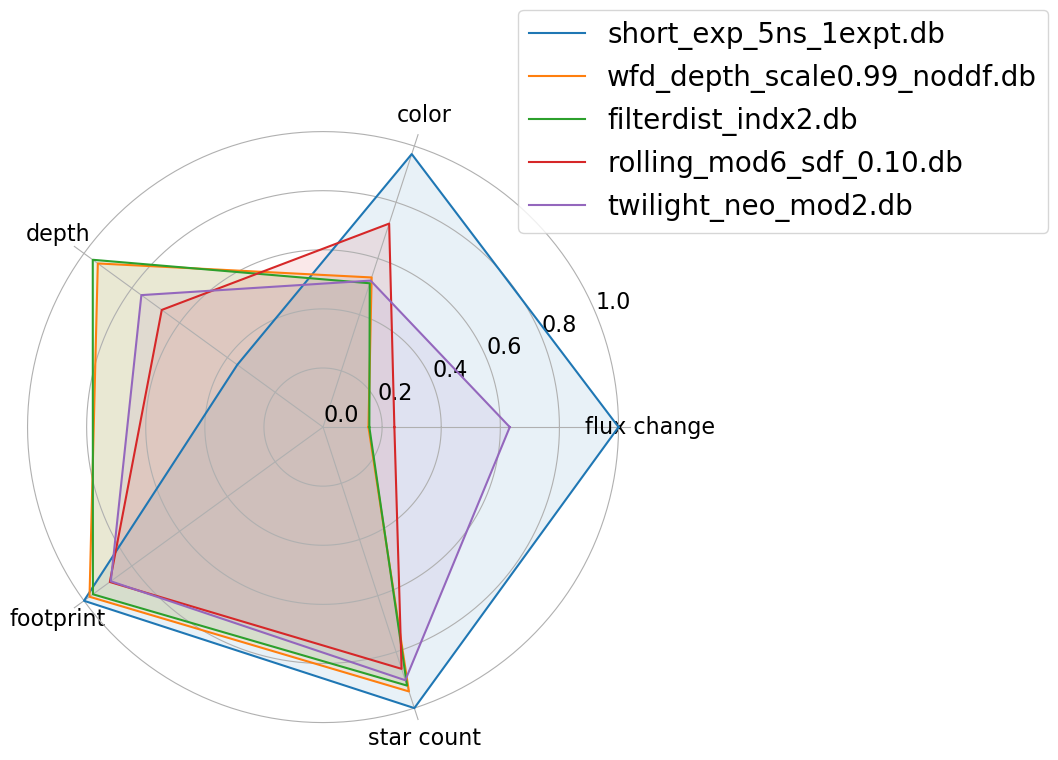

In [10]:
plt.style.use('default')
#plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

dbnames = [ #'baseline_v1.5_10yrs', 'footprint_big_skyv1.5_10yrs',
           #'twilight_neo_mod1_v1.5_10yrs',
           #'wfd_depth_scale0.99_v1.5_10yrs'
           'short_exp_5ns_1expt_v1.5_10yrs.db',
           'wfd_depth_scale0.99_noddf_v1.5_10yrs.db',
           #'bulges_bs_v1.5_10yrs',
           'filterdist_indx2_v1.5_10yrs.db',
           'rolling_mod6_sdf_0.10_v1.5_10yrs.db',
           'twilight_neo_mod2_v1.5_10yrs.db',
           #'footprint_big_sky_nouiyv1.5_10yrs'  
          ]

#FoMvars = ['FoM_tgaps_same', 'FoM_tgaps_diff', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]

FoMvars = ['flux change', 'color', 'depth', 'footprint', 'star count', ]


fig, ax = plt.subplots(1,1,figsize=(8,8), subplot_kw={'projection': 'polar'} )

for dbname in dbnames:
    r = df_radar[ df_radar.db==dbname ][FoMvars].values.flatten()
    print(r)
    label = dbname.replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "")
    ax = plot_radar(r=r, label=label, fill=True, ax=ax)

#FoMvarsnames = ['flux change', 'color', 'depth', 'footprint', 'star count', ]
ax.set_xticklabels(FoMvars, );
ax.set_yticks([0, .2, .4, .6, .8, 1])
#ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.2))

plt.savefig("figures/radar_wfd.pdf", bbox_inches='tight')



In [11]:
df_radar = pd.read_csv("./data/df_radar_log_v1.5_ALL.csv")

[1.         0.97453161 0.47720047 1.         0.4762158 ]
[0.14404315 0.50688737 0.97085933 0.92109971 0.29422595]
[0.15355534 0.49815629 0.98517016 0.97377488 1.        ]
[0.23365614 0.70204323 0.80895276 0.8538632  0.3109087 ]
[0.63008932 0.52210229 0.87176209 0.84961466 0.32560744]


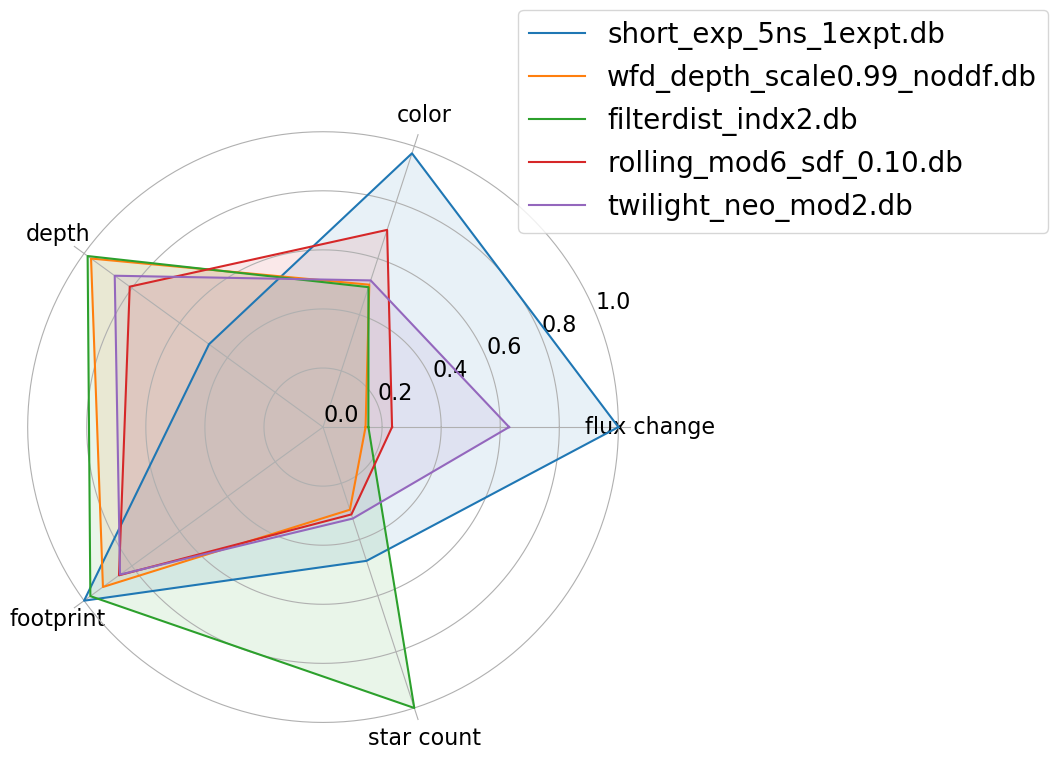

In [12]:
plt.style.use('default')
#plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

dbnames = [ #'baseline_v1.5_10yrs', 'footprint_big_skyv1.5_10yrs',
           #'twilight_neo_mod1_v1.5_10yrs',
           #'wfd_depth_scale0.99_v1.5_10yrs'
           'short_exp_5ns_1expt_v1.5_10yrs.db',
           'wfd_depth_scale0.99_noddf_v1.5_10yrs.db',
           #'bulges_bs_v1.5_10yrs',
           'filterdist_indx2_v1.5_10yrs.db',
           'rolling_mod6_sdf_0.10_v1.5_10yrs.db',
           'twilight_neo_mod2_v1.5_10yrs.db',
           #'footprint_big_sky_nouiyv1.5_10yrs'  
          ]

#FoMvars = ['FoM_tgaps_same', 'FoM_tgaps_diff', 'FoM_depth', 'FoM_EG', 'FoM_Gal', ]

FoMvars = ['flux change', 'color', 'depth', 'footprint', 'star count', ]


fig, ax = plt.subplots(1,1,figsize=(8,8), subplot_kw={'projection': 'polar'} )

for dbname in dbnames:
    r = df_radar[ df_radar.db==dbname ][FoMvars].values.flatten()
    print(r)
    label = dbname.replace("_v1.5_10yrs", "").replace("v1.5_10yrs", "")
    ax = plot_radar(r=r, label=label, fill=True, ax=ax)

#FoMvarsnames = ['flux change', 'color', 'depth', 'footprint', 'star count', ]
ax.set_xticklabels(FoMvars, );
ax.set_yticks([0, .2, .4, .6, .8, 1])
#ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(1.7, 1.2))

plt.savefig("figures/radar_all.pdf", bbox_inches='tight')




### calculate area of radar plots

In [110]:
cols=['flux change', 'color', 'depth', 'footprint', 'star count']

In [73]:
df=df_radar

In [74]:
df.iloc[0]

db             agnddf_v1.5_10yrs
flux change             0.132988
color                   0.503818
footprint               0.717233
star count              0.728116
depth                   0.931742
family                    agnddf
Name: 0, dtype: object

In [124]:
def get_area(df, cols=['flux change', 'color', 'depth', 'footprint', 'star count', 'flux change']):
    """get area of radar plot """
    area = 0
    for i in range( len(cols)-1 ):
        area += df[ cols[i] ] * df[ cols[i+1]] 
        
    return area
 

In [133]:
df_radar['total'] = np.sum(df[ ['flux change', 'color', 'depth', 'footprint', 'star count'] ], axis=1)
df_radar['area'] = df_radar.apply(get_area, axis=1, 
                                  cols=['flux change', 'color', 'depth', 'footprint', 'star count', 'flux change'] )

In [134]:
df_radar['std'] = np.std(df_radar[['flux change', 'color', 'depth', 'footprint', 'star count']], axis=1)

In [135]:
df = df_radar[ np.isin( df_radar['db'].values, dbnames) ]
df

,db,flux change,color,footprint,star count,depth,family,area,std,total
21,filterdist_indx2_v1.5_10yrs,0.156700,0.614728,0.961244,0.918064,0.963238,filterdist,2.640710,0.311430,3.613975
51,rolling_mod6_sdf_0.10_v1.5_10yrs,0.241430,1.000000,0.887790,0.856349,0.674592,rolling,2.481924,0.266650,3.660161
55,short_exp_5ns_1expt_v1.5_10yrs,1.000000,0.884054,1.000000,1.000000,0.358649,short,3.559769,0.249028,4.242703
65,twilight_neo_mod2_v1.5_10yrs,0.631967,0.549124,0.888679,0.900675,0.759894,twilight,2.809213,0.138736,3.730338
84,wfd_depth_scale0.99_noddf_v1.5_10yrs,0.153669,0.663368,0.975811,0.940291,0.942138,wfd,2.708313,0.311807,3.675278


In [136]:
df['score'] = df['area'] /df['std']

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
df.sort_values(by="area", ascending=False)

,db,flux change,color,footprint,star count,depth,family,area,std,total,score
55,short_exp_5ns_1expt_v1.5_10yrs,1.000000,0.884054,1.000000,1.000000,0.358649,short,3.559769,0.249028,4.242703,14.294648
65,twilight_neo_mod2_v1.5_10yrs,0.631967,0.549124,0.888679,0.900675,0.759894,twilight,2.809213,0.138736,3.730338,20.248630
84,wfd_depth_scale0.99_noddf_v1.5_10yrs,0.153669,0.663368,0.975811,0.940291,0.942138,wfd,2.708313,0.311807,3.675278,8.685868
21,filterdist_indx2_v1.5_10yrs,0.156700,0.614728,0.961244,0.918064,0.963238,filterdist,2.640710,0.311430,3.613975,8.479304
51,rolling_mod6_sdf_0.10_v1.5_10yrs,0.241430,1.000000,0.887790,0.856349,0.674592,rolling,2.481924,0.266650,3.660161,9.307793


### parallel coord plot

In [14]:
family2color = {'agnddf': '#a6cee3',
 'alt': '#1f78b4',
 'baseline': '#b2df8a',
 'bulges': '#33a02c',
 'daily': '#fb9a99',
 'dcr': '#e31a1c',
 'descddf': '#fdbf6f',
 'filterdist': '#ff7f00',
 'footprint': '#cab2d6',
 'goodseeing': '#6a3d9a',
 'greedy': '#ffff99',
 'roll': '#b15928',
 'rolling': '#004301',
 'short': '#5e0022',
 'spiders': '#ed00d7',
 'third': '#00008f',
 'twilight': '#626d60',
 'u60': '#9978ff',
 'var': '#5b3600',
 'wfd': '#00a799'}


In [15]:
family2color = {'agnddf': '#a6cee3',
 'alt': '#1f78b4',
 'baseline': '#b2df8a',
 'bulges': '#33a02c',
 'daily': '#fb9a99',
 'dcr': '#e31a1c',
 'descddf': '#fdbf6f',
 'filterdist': '#ff7f00',
 'footprint': '#cab2d6',
 'goodseeing': '#6a3d9a',
 'greedy': '#ffff99',
 'roll': '#b15928',
 'rolling': '#004301',
 'short': '#5e0022',
 'spiders': '#ed00d7',
 'third': '#00008f',
 'twilight': '#626d60',
 'u60': '#9978ff',
 'var': '#5b3600',
 'wfd': '#00a799',
 'cadence': '#1F87A7',
 'ddf': '#2A0319',
 'euclid': '#46982C',
 'pair': '#933379',
 'twi': '#626d60',
 'u': '#9978ff'}



In [16]:
def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]

In [175]:
df_radar = pd.read_csv( './data/df_para.csv' )

df_radar['family'] = df_radar.apply(get_family, axis=1)

colorlist = [ family2color[i] for i in df_radar.family.values ]


In [21]:
df_radar.family.unique()

array(['agnddf', 'alt', 'baseline', 'bulges', 'daily', 'dcr', 'descddf',
       'filterdist', 'footprint', 'goodseeing', 'greedy', 'roll',
       'rolling', 'short', 'spiders', 'third', 'twilight', 'u60', 'var',
       'wfd'], dtype=object)

In [19]:
df_radar.columns

Index(['db', 'Nv', 'linear uniform', 'log uniform', 'log normal', 'family'], dtype='object')

In [180]:
df = df_radar.sort_values(by='log uniform', ascending=False).head(15)

In [182]:
df

,db,family,Nv,linear uniform,log uniform,log normal
56,short_exp_5ns_5expt,short,82,82,85,80
55,short_exp_5ns_1expt,short,85,83,84,82
53,short_exp_2ns_1expt,short,80,77,83,75
54,short_exp_2ns_5expt,short,79,76,82,73
52,rolling_mod6_sdf_0.20,rolling,83,84,81,84
51,rolling_mod6_sdf_0.10,rolling,84,85,80,85
69,var_expt,var,54,72,79,83
2,alt_roll_mod2_dust_sdf_0.20,alt,81,81,78,81
49,rolling_mod3_sdf_0.10,rolling,76,78,77,79
64,twilight_neo_mod1,twilight,60,53,76,38


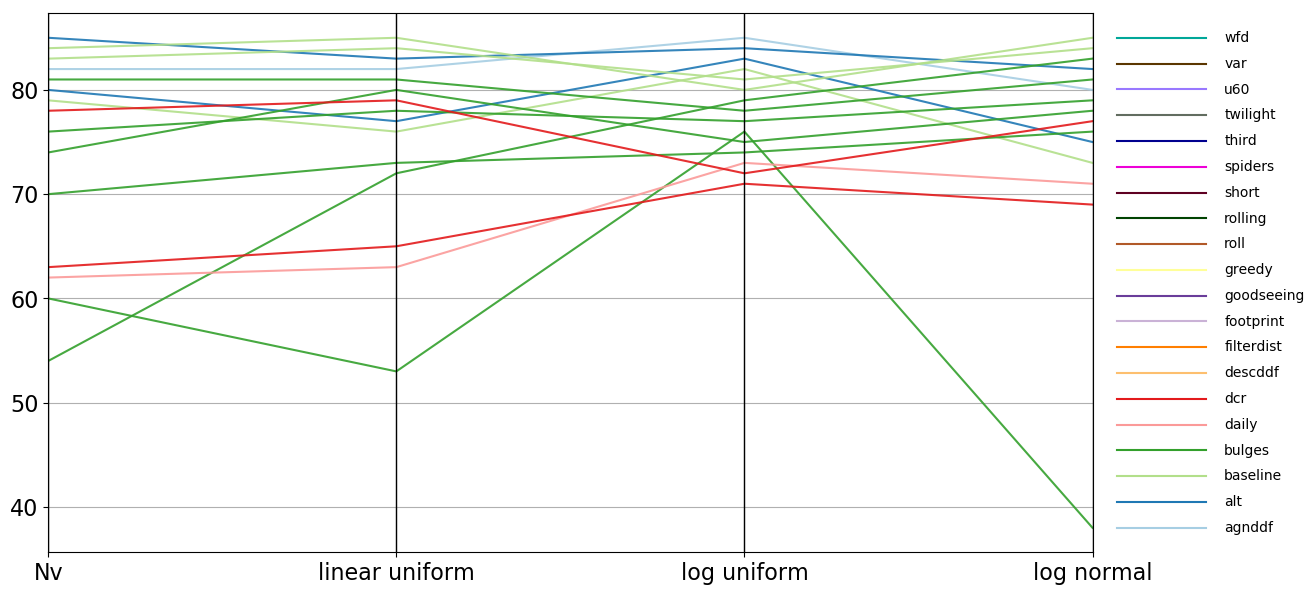

In [181]:
fig = plt.figure(figsize=(15,7))
#pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])
#FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal',]
FoMvars = [ 'Nv', 'linear uniform', 'log uniform', 'log normal']


ax = pd.plotting.parallel_coordinates(
    df, "db", FoMvars, color=colorlist, alpha=0.9,)

plt.xticks([0,1,2,3], labels=['Nv', 'linear uniform', 'log uniform', 'log normal'],)
#           fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate( df_radar.family.unique() ):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=1)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
#plt.savefig('figures/opsimParallelCoord.pdf')



In [29]:
df_radar[:5]

,db,Nv,linear uniform,log uniform,log normal,family
0,agnddf,31,32,26,27,agnddf
1,alt_dust,74,80,75,78,alt
2,alt_roll_mod2_dust_sdf_0.20,81,81,78,81,alt
3,baseline_2snaps,18,18,29,22,baseline
4,baseline_samefilt,0,0,0,0,baseline


### df_radar

In [57]:
df_radar = pd.read_csv( './data_v1_5/df_radar_all_v1_5_v1_7.csv' )

In [49]:
df_radar['family'] = df_radar.apply(get_family, axis=1)



In [17]:
df_radar.family.unique()

array(['agnddf', 'alt', 'baseline', 'bulges', 'daily', 'dcr', 'descddf',
       'filterdist', 'footprint', 'goodseeing', 'greedy', 'roll',
       'rolling', 'short', 'spiders', 'third', 'twilight', 'u60', 'var',
       'wfd'], dtype=object)

In [51]:
colorlist = [ family2color[i] for i in df_radar.family.values ]

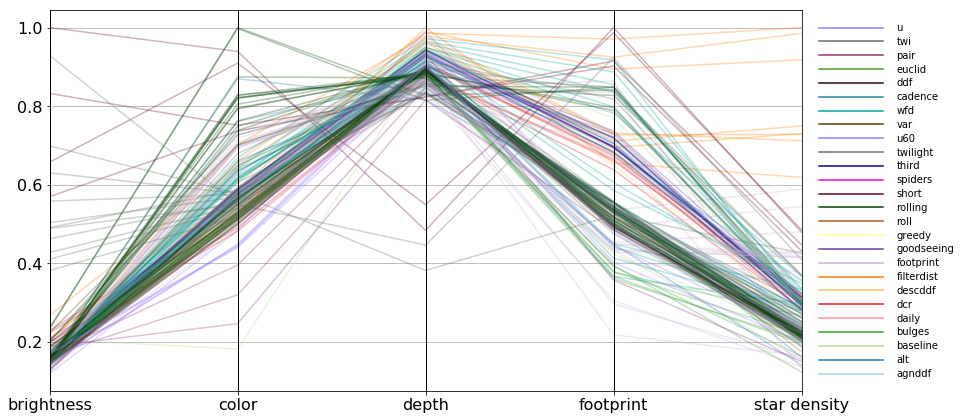

In [52]:
fig = plt.figure(figsize=(15,7))
#pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])
#FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal',]
FoMvars = ['brightness', 'color', 'depth', 'footprint', 'star density']


ax = pd.plotting.parallel_coordinates(
    df_radar, "db", FoMvars, color=colorlist, alpha=0.3,)

plt.xticks([0,1,2,3,4], labels=["brightness", "color", "depth", "footprint", "star density"],)
#           fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate(family2color):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=1)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
plt.savefig('figures/opsimParallelCoord.pdf')


In [53]:
df_radar_cum = df_radar.copy()

In [54]:
df_radar_cum['color'] += df_radar_cum['brightness']

df_radar_cum['depth'] += df_radar_cum['color']

df_radar_cum['footprint'] += df_radar_cum['depth']

df_radar_cum['star density'] += df_radar_cum['footprint']



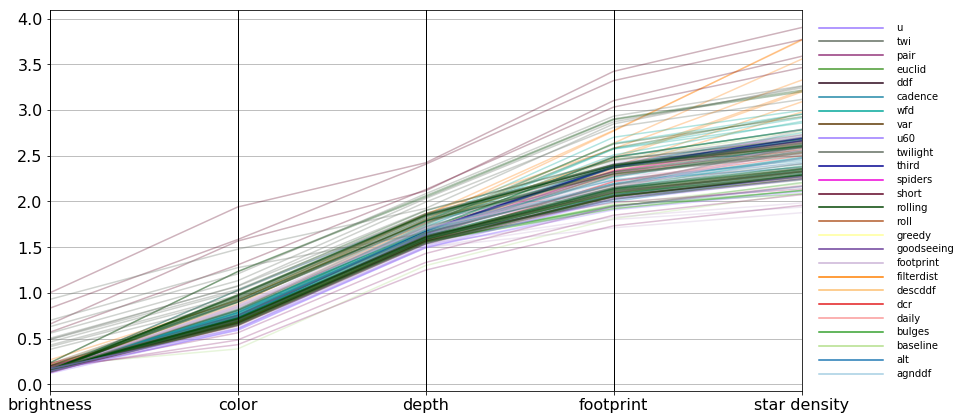

In [55]:
fig = plt.figure(figsize=(15,7))
#pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])
#FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal',]
FoMvars = ['brightness', 'color', 'depth', 'footprint', 'star density']


ax = pd.plotting.parallel_coordinates(
    df_radar_cum, "db", FoMvars, color=colorlist, alpha=0.3,)

plt.xticks([0,1,2,3,4], labels=["brightness", "color", "depth", "footprint", "star density"],)
#           fontsize=20)
ax.legend().remove()
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate(family2color):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=1)
    ax.text(1.2, i, c, ha="left", va='center')
    ax.axis('off')
    
plt.savefig('figures/opsimParallelCoord_cum.pdf')



### prepare df_tgaps_para 

In [25]:
# for wfd v1.5
df_tgaps_log = pd.read_csv('./data/df_tgaps_log_v1.5_WFD.csv')
df_tgaps_lin = pd.read_csv('./data/df_tgaps_lin_v1.5_WFD.csv')
df_tgaps_Nv = pd.read_csv('./data/df_tgaps_Nv_v1.5_WFD.csv')
df_tgaps_lognorm = pd.read_csv('./data/df_tgaps_lognorm_v1.5_WFD.csv')



In [26]:
# normalize

for df in [df_tgaps_log, df_tgaps_lin,df_tgaps_Nv, df_tgaps_lognorm]:
    for col in cols_all:
        df[col] = scale(df[col], mode=0)


    df['total_same'] = scale( np.sum(df[ cols_same ], axis=1) )
    df['total_diff'] = scale( np.sum(df[ cols_diff ], axis=1) )



In [27]:
df_tgaps_para = pd.DataFrame()
df_tgaps_para['db'] = dblist_v15

df_tgaps_para['log uniform'] = df_tgaps_log['total_diff'] 
df_tgaps_para['linear'] = df_tgaps_lin['total_diff'] 
df_tgaps_para['Nv'] = df_tgaps_Nv['total_diff'] 
df_tgaps_para['log normal'] = df_tgaps_lognorm['total_diff'] 

df_tgaps_para['family'] = df_tgaps_para.apply(get_family, axis=1)

# save file 
df_tgaps_para.to_csv('./data/df_tgaps_para.csv', index=False)

In [45]:
df_tgaps_rank = df_tgaps_para.copy()

for i in ['log uniform', 'linear', 'Nv', 'log normal']:
    df_tgaps_rank[i] = np.argsort( np.argsort( df_tgaps_rank[i] ) )


In [50]:
df_tgaps_rank.head()

,db,log uniform,linear,Nv,log normal,family
0,agnddf_v1.5_10yrs.db,26,32,31,31,agnddf
1,alt_dust_v1.5_10yrs.db,75,80,72,77,alt
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db,78,81,79,81,alt
3,baseline_2snaps_v1.5_10yrs.db,29,18,18,21,baseline
4,baseline_samefilt_v1.5_10yrs.db,0,0,0,0,baseline


In [51]:
family2color = {'agnddf': '#a6cee3',
 'alt': '#1f78b4',
 'baseline': '#b2df8a',
 'bulges': '#33a02c',
 'daily': '#fb9a99',
 'dcr': '#e31a1c',
 'descddf': '#fdbf6f',
 'filterdist': '#ff7f00',
 'footprint': '#cab2d6',
 'goodseeing': '#6a3d9a',
 'greedy': '#ffff99',
 'roll': '#b15928',
 'rolling': '#004301',
 'short': '#5e0022',
 'spiders': '#ed00d7',
 'third': '#00008f',
 'twilight': '#626d60',
 'u60': '#9978ff',
 'var': '#5b3600',
 'wfd': '#00a799',
 'cadence': '#1F87A7',
 'ddf': '#2A0319',
 'euclid': '#46982C',
 'pair': '#933379',
 'twi': '#626d60',
 'u': '#9978ff'}



In [61]:
df_tgaps_rank.

In [78]:
df_rank = df_tgaps_rank.sort_values(by='log uniform', 
                                    ascending=False, 
                                   ).reset_index(drop=True)


In [79]:
df_rank = df_rank[:20]

In [80]:
df_rank

,db,log uniform,linear,Nv,log normal,family
0,short_exp_5ns_5expt_v1.5_10yrs.db,85,82,84,82,short
1,short_exp_5ns_1expt_v1.5_10yrs.db,84,83,85,83,short
2,short_exp_2ns_1expt_v1.5_10yrs.db,83,77,81,76,short
3,short_exp_2ns_5expt_v1.5_10yrs.db,82,76,80,75,short
4,rolling_mod6_sdf_0.20_v1.5_10yrs.db,81,84,82,84,rolling
5,rolling_mod6_sdf_0.10_v1.5_10yrs.db,80,85,83,85,rolling
6,var_expt_v1.5_10yrs.db,79,72,40,80,var
7,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db,78,81,79,81,alt
8,rolling_mod3_sdf_0.10_v1.5_10yrs.db,77,78,75,79,rolling
9,twilight_neo_mod1_v1.5_10yrs.db,76,53,47,40,twilight


In [81]:
colorlist = [ family2color[i] for i in df_rank.family.values ]


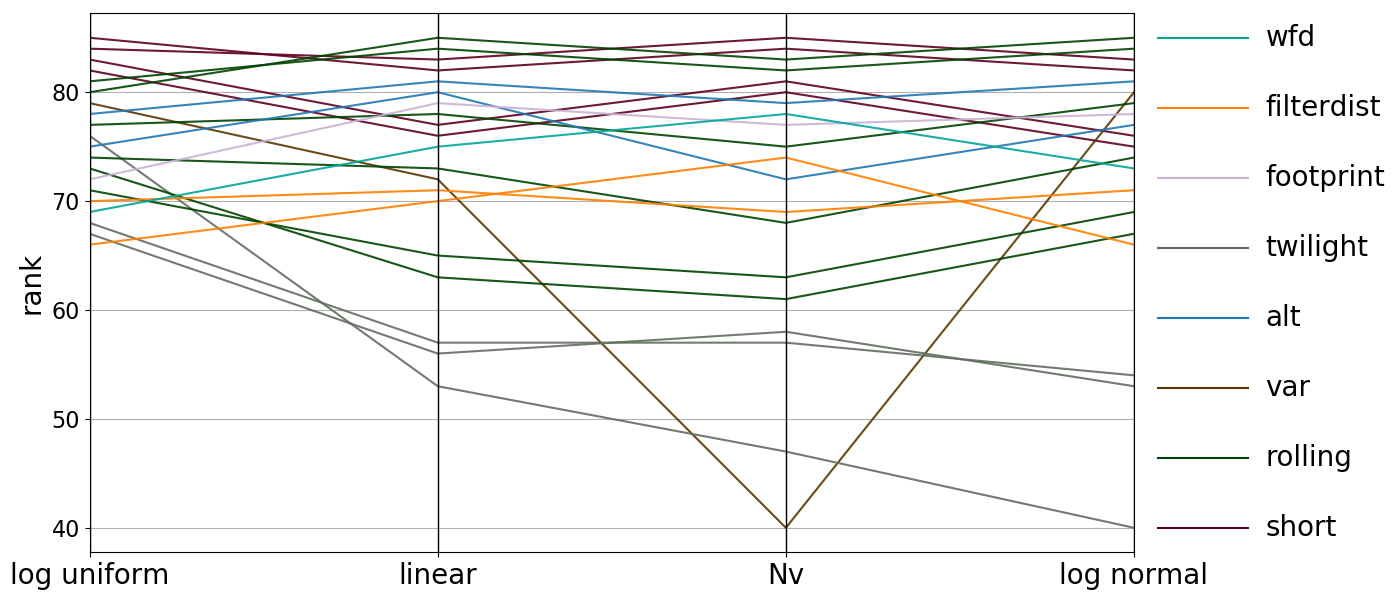

In [164]:
fig = plt.figure(figsize=(15,7))
#pl.rcParams["font.size"] = 20
gs = fig.add_gridspec(1, 10)
ax = fig.add_subplot(gs[0, :9])
#FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal',]
FoMvars = ['log uniform', 'linear', 'Nv', 'log normal']

ax = pd.plotting.parallel_coordinates(
    df_rank, "db", FoMvars, color=colorlist, alpha=0.9,)

plt.xticks([0,1,2,3], labels=['log uniform', 'linear', 'Nv', 'log normal'], 
          fontsize=20)
ax.legend().remove()
ax.set_ylabel('rank', fontsize='20')
ax = fig.add_subplot(gs[0, 9:])
for i,c in enumerate( df_rank.family.unique() ):
    ax.plot([0, 1], [i,i], color=family2color[c], alpha=1)
    ax.text(1.2, i, c, ha="left", va='center', fontsize='20')
    ax.axis('off')


plt.savefig('figures/tgaps_para.pdf')



---

### footprint 2d vs 1.5h

In [99]:
fomcsv = './data/df_Nfields_v1.5_WFD_2d.csv'
dblist_all = dblist_v15

df_norm_2d = get_df_norm(fomcsv = fomcsv, cols=cols_all, mode=0)[cols_diff_db]

fomcsv = './data/df_Nfields_v1.5_WFD_15h.csv'
df_norm_15h = get_df_norm(fomcsv = fomcsv, cols=cols_all, mode=0)[cols_diff_db]




In [100]:
df_norm_2d['total'] = np.sum(df_norm_2d[ cols_diff ], axis=1)
df_norm_15h['total'] = np.sum(df_norm_15h[ cols_diff ], axis=1)

df_norm_2d['rank'] = np.argsort( np.argsort( df_norm_2d['total'] ) )
df_norm_15h['rank'] = np.argsort( np.argsort( df_norm_15h['total'] ) )



In [101]:
df = df_norm_2d.merge (df_norm_15h, on='db', suffixes=['_2d', '_15h']) [['db', 'rank_2d', 'rank_15h']]



In [102]:
df [ 'rank_diff'] = df [ 'rank_15h'] - df [ 'rank_2d']


In [157]:
df.head()

,db,rank_2d,rank_15h,rank_diff
0,agnddf,47,44,-3
1,alt_dust,17,72,55
2,alt_roll_mod2_dust_sdf_0.20,35,82,47
3,baseline_2snaps,16,21,5
4,baseline_samefilt,2,0,-2


In [160]:
df[np.abs(df.rank_diff) > 10]

,db,rank_2d,rank_15h,rank_diff
1,alt_dust,17,72,55
2,alt_roll_mod2_dust_sdf_0.20,35,82,47
17,dcr_nham2_ugr,24,8,-16
18,dcr_nham2_ugri,26,10,-16
20,filterdist_indx1,61,38,-23
23,filterdist_indx4,45,17,-28
24,filterdist_indx5,52,36,-16
25,filterdist_indx6,44,28,-16
27,filterdist_indx8,74,63,-11
28,footprint_add_mag_clouds,37,48,11


(-60, 60)

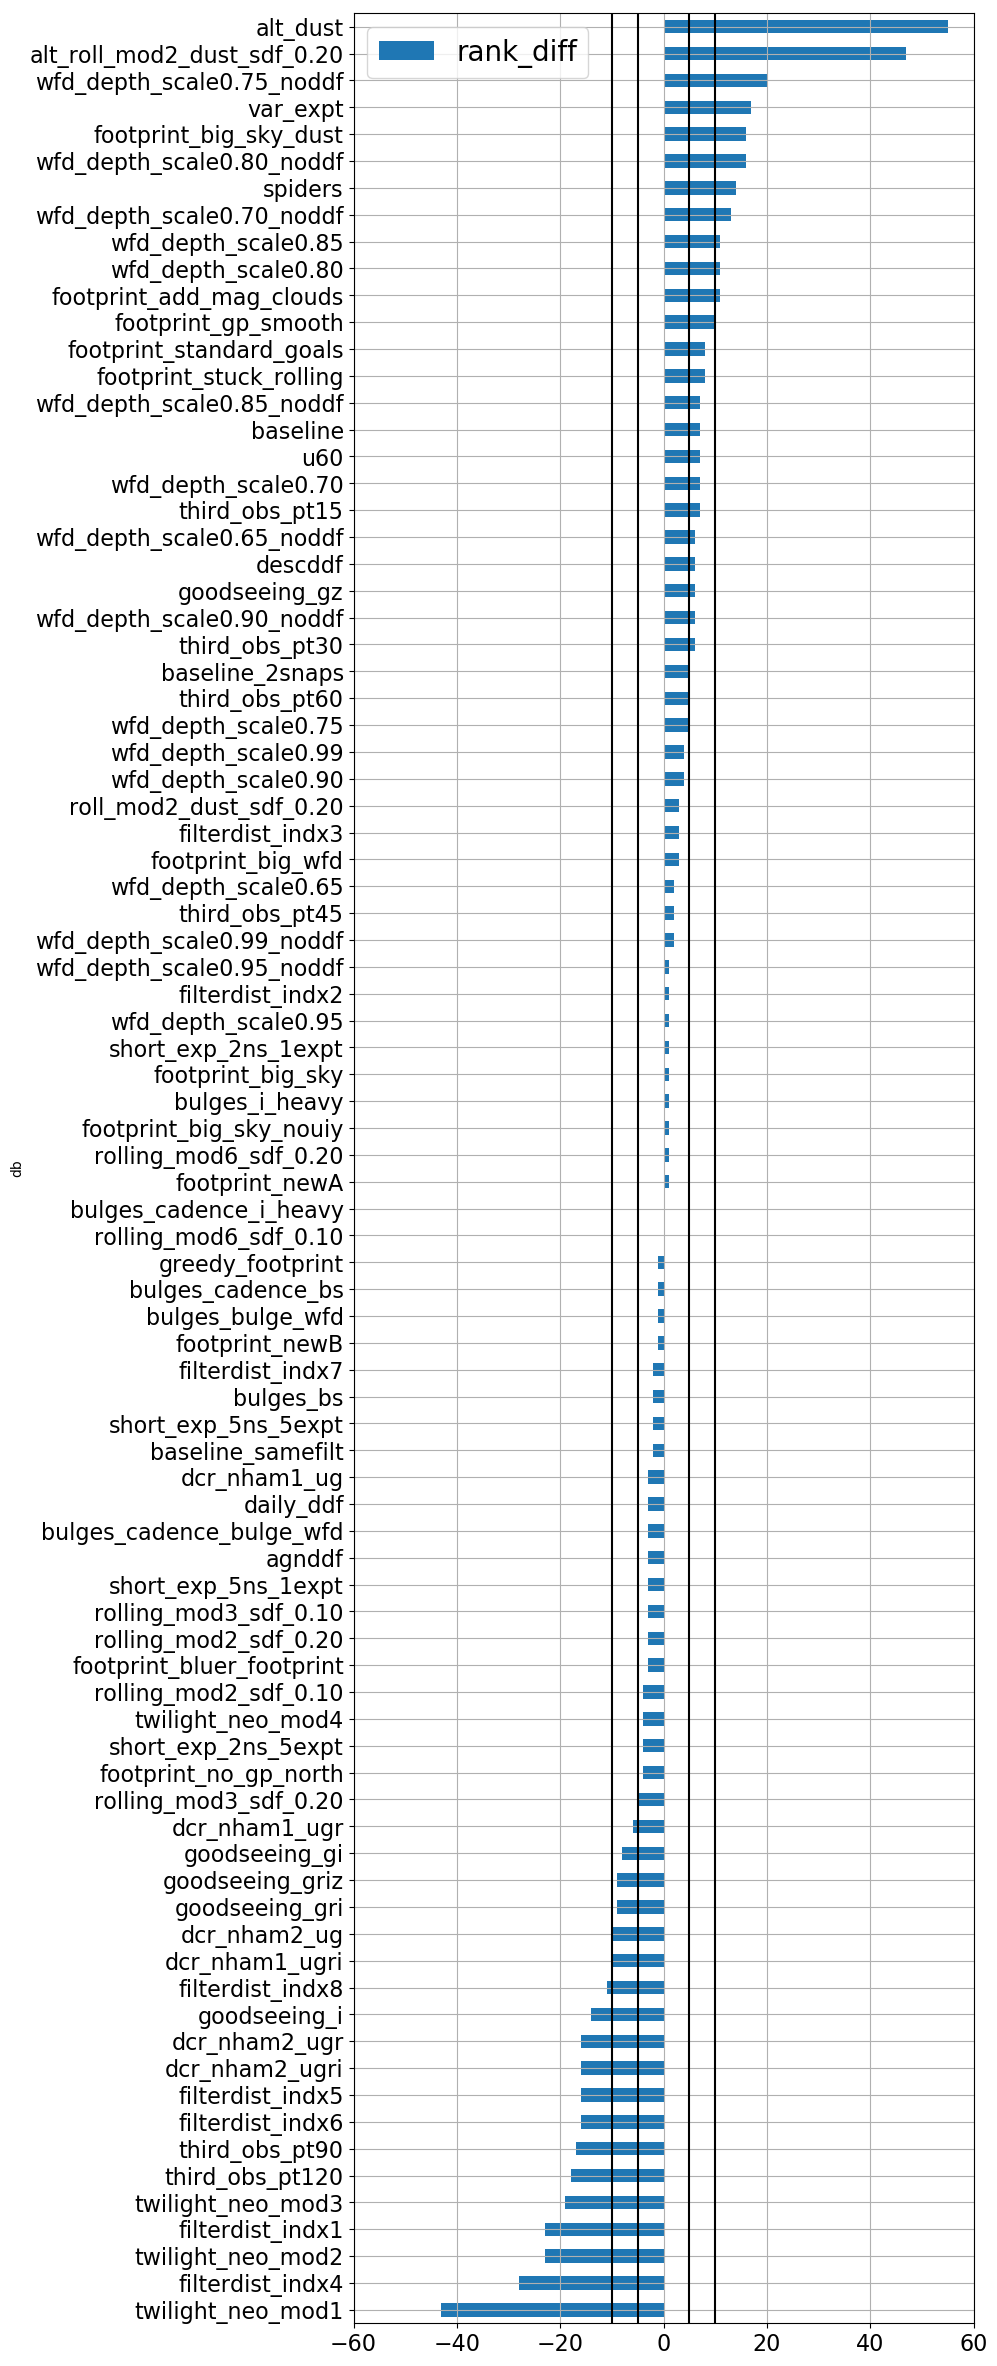

In [156]:


ax = df[['db', 'rank_diff']].set_index('db') \
                            .sort_values(by='rank_diff').plot.barh(figsize=(8, 30))

ax.axvline(5, color='k')
ax.axvline(-5, color='k')

ax.axvline(10, color='k')

ax.axvline(-10, color='k')


ax.grid()
ax.set_xlim([-60, 60])

In [103]:
df.sort_values(by='rank_diff')

,db,rank_2d,rank_15h,rank_diff
64,twilight_neo_mod1,72,29,-43
23,filterdist_indx4,45,17,-28
65,twilight_neo_mod2,66,43,-23
20,filterdist_indx1,61,38,-23
66,twilight_neo_mod3,64,45,-19
58,third_obs_pt120,32,14,-18
63,third_obs_pt90,42,25,-17
25,filterdist_indx6,44,28,-16
24,filterdist_indx5,52,36,-16
18,dcr_nham2_ugri,26,10,-16
